In [14]:
# importing panda library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
  
# readinag given csv file
# and creating dataframe
df = pd.read_csv("Metazygia monitor 1.txt", delimiter = "\t")

# adding column headings
#df.columns = ['Index', 'Date', 'Time']
#'folder/subfolder/out.csv'  
# store dataframe into csv file
df.to_csv('Metazygia monitor 1.csv', index = None)
dfcsv = pd.read_csv("Metazygia monitor 1_DD-Dropped Data.csv")
periods = pd.read_csv("Metazygia monitor 1_DD_Stats.csv")

In [15]:
periods.index = periods['Spider']
periods = periods.drop(index = ['Monitor 1 Spider 3','Monitor 1 Spider 5','Monitor 1 Spider 6',
                               'Monitor 1 Spider 7', 'Monitor 1 Spider 10', 'Monitor 1 Spider 11', 'Monitor 1 Spider 13',
                               'Monitor 1 Spider 27', 'Monitor 1 Spider 28', 'Monitor 1 Spider 30', 'Monitor 1 Spider 32'])
periods = periods.drop(columns = ['Amplitude', 'p value', 'Spider'])

In [16]:
#periods = periods['Period']
display(periods)

,Period
Spider,
Monitor 1 Spider 1,22.011150
Monitor 1 Spider 2,21.316001
Monitor 1 Spider 4,24.676897
Monitor 1 Spider 8,23.242881
Monitor 1 Spider 9,23.806503
Monitor 1 Spider 12,16.726750
Monitor 1 Spider 14,18.925236
Monitor 1 Spider 15,20.822787
Monitor 1 Spider 16,21.571475


In [17]:
#Function to drop incomplete days from the data set
def wholedays(df):
    start = df.index[df['Time']=='00:00:00']
    end=df.index[df['Time']=='23:59:00']
    newdf=df[start[0]:(end[-1]+1)]
    return newdf

#Funtion to set the index as the Date and Time
def setindex(df):
    df['Date_Time']=pd.to_datetime(df['Date'] + ' ' + df['Time'])
    df = df.set_index(pd.DatetimeIndex(df['Date_Time']))
    df = df.drop(['Date', 'Time', 'Date_Time'], axis = 1)
    return df

#Funtion to convert txt file to csv file
def txt_to_csv(txt):
    df=pd.read_csv(txt+'.txt',delimiter = "\t")
    df.to_csv(txt+'.csv', index = None)
    dfcsv = pd.read_csv(str(txt)+'.csv')
#Dropping random empty columns
    df1 = dfcsv.iloc[:, 1:3] 
    df1 = df1.join(dfcsv.iloc[:, -33:])
#Create column names for each spider
    columns=[]
    for i in range(0,32):
        columns.append('Monitor 1 Spider '+str(i+1))
    columns_names = [ 'Date', 'Time', 'lights']
    column_names=np.concatenate((columns_names, columns))
    df1.columns = column_names
#Run functions to drop incomplete days and set index
    df1=wholedays(df1)
    df1=setindex(df1)
    return(df1)
    
#df1 = txt_to_csv('"Metazygia monitor 1_DD-Dropped Data.csv')
df1 = pd.read_csv("Metazygia monitor 1_DD-Dropped Data.csv")
df1 = df1.dropna(axis=1)
display(df1)

,Date_Time,lights,Monitor 1 Spider 1,Monitor 1 Spider 2,Monitor 1 Spider 4,Monitor 1 Spider 8,Monitor 1 Spider 9,Monitor 1 Spider 12,Monitor 1 Spider 14,Monitor 1 Spider 15,Monitor 1 Spider 16,Monitor 1 Spider 18,Monitor 1 Spider 19,Monitor 1 Spider 20,Monitor 1 Spider 21,Monitor 1 Spider 25,Monitor 1 Spider 26,Monitor 1 Spider 29,Monitor 1 Spider 31
0,2017-04-26 00:00:00,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,7
1,2017-04-26 00:01:00,0,11,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
2,2017-04-26 00:02:00,0,4,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,3
3,2017-04-26 00:03:00,0,4,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,11
4,2017-04-26 00:04:00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12955,2017-05-04 23:55:00,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0
12956,2017-05-04 23:56:00,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0
12957,2017-05-04 23:57:00,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0
12958,2017-05-04 23:58:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
min_day=1440
total_time = len(df.index)
num_days = total_time//min_day

#Split DataFrame into LD and DD DataFrames
def LDandDD(df):
    #Run for loop to check the light activity of each day
    for i in range(0,num_days):
        dfnew=df[min_day*(i):min_day*(i+1)]
        dfnew=dfnew.reset_index(drop=True)
        #Find the first day of the DD cycle. This is where we will split the 
        #DataFrame
        if np.mean(dfnew.lights)==0:
            end=min_day*i
            break
    LDdf=df1.iloc[:end]
    DDdf=df1.iloc[end:]
    return LDdf, DDdf

LDdf, DDdf = LDandDD(df1)
LDdf.to_csv('Metazygia monitor 1_LD.csv')
DDdf.to_csv('Metazygia monitor 1_DD.csv')

In [19]:
DDdf.index = DDdf['Date_Time']
DDdf = DDdf.drop(columns = ['Date_Time'])
display(DDdf)

,lights,Monitor 1 Spider 1,Monitor 1 Spider 2,Monitor 1 Spider 4,Monitor 1 Spider 8,Monitor 1 Spider 9,Monitor 1 Spider 12,Monitor 1 Spider 14,Monitor 1 Spider 15,Monitor 1 Spider 16,Monitor 1 Spider 18,Monitor 1 Spider 19,Monitor 1 Spider 20,Monitor 1 Spider 21,Monitor 1 Spider 25,Monitor 1 Spider 26,Monitor 1 Spider 29,Monitor 1 Spider 31
Date_Time,,,,,,,,,,,,,,,,,,
2017-04-26 00:00:00,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,7
2017-04-26 00:01:00,0,11,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
2017-04-26 00:02:00,0,4,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,3
2017-04-26 00:03:00,0,4,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,11
2017-04-26 00:04:00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-04 23:55:00,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0
2017-05-04 23:56:00,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0
2017-05-04 23:57:00,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0


In [20]:
# Extract the spider columns (assuming they are named as col1, col2, ..., col32)
DDdf['Average_Activity'] = np.nan
spider_columns = DDdf.columns[1:-1]
#print(spider_columns)

for column in DDdf.columns:
    DDdf[column] = DDdf[column]  / DDdf[column].abs().max()

for i in range(0,len(DDdf.index)):
    sum_row = DDdf[spider_columns].iloc[i].sum(axis=0)
    DDdf.Average_Activity[i] = sum_row/(len(DDdf.columns)-2)
    #print("Average activity in first minute ", sum_row/len(spider_columns))


display(DDdf)

,lights,Monitor 1 Spider 1,Monitor 1 Spider 2,Monitor 1 Spider 4,Monitor 1 Spider 8,Monitor 1 Spider 9,Monitor 1 Spider 12,Monitor 1 Spider 14,Monitor 1 Spider 15,Monitor 1 Spider 16,Monitor 1 Spider 18,Monitor 1 Spider 19,Monitor 1 Spider 20,Monitor 1 Spider 21,Monitor 1 Spider 25,Monitor 1 Spider 26,Monitor 1 Spider 29,Monitor 1 Spider 31,Average_Activity
Date_Time,,,,,,,,,,,,,,,,,,,
2017-04-26 00:00:00,NaN,0.000000,0.0,0.0,0.0,0.0,0.132075,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.225806,0.021052
2017-04-26 00:01:00,NaN,0.478261,0.0,0.0,0.0,0.0,0.037736,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.030353
2017-04-26 00:02:00,NaN,0.173913,0.0,0.0,0.0,0.0,0.132075,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.096774,0.023692
2017-04-26 00:03:00,NaN,0.173913,0.0,0.0,0.0,0.0,0.188679,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.354839,0.042202
2017-04-26 00:04:00,NaN,0.043478,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.129032,0.010148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-04 23:55:00,NaN,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.260870,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.015345
2017-05-04 23:56:00,NaN,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.208333,0.0,0.0,0.0,0.000000,0.012255
2017-05-04 23:57:00,NaN,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.208333,0.0,0.0,0.0,0.000000,0.012255


In [21]:
sum_row = DDdf[spider_columns].iloc[0].sum(axis=0)
print("Average activity in first minute ", sum_row/len(spider_columns))

Average activity in first minute  0.021051877841824496


In [22]:
#Create uniform y-axis limit
def create_ylimit(df):
    #find the standard deviation and mean of each column from the dataset without zeros
    df_limit=df.replace(0, np.nan)
    std=df_limit.std()
    mean=df_limit.mean()
    #Find mean and standard deviation of all of the data
    df_mean=np.mean(mean)
    df_std =np.mean(std)
    #y limit = mean of the dataframe plus 3 standard deviations
    y_limit = df_mean +3*df_std
    return y_limit

In [23]:
def plot_night_test(df):
    #Make a copy of the dataframe and create two columns for the difference between the light values and for the date and time
    dfc = df.copy()
    dfc['diff'] = dfc.lights.diff()
    dfc[["day", "time"]] = dfc["Date_Time"].str.split(" ", expand = True)
    #Separate by the difference to determine when the light is coming on or going off
    df_off = dfc.loc[dfc['diff'] == 1]
    df_on = dfc.loc[dfc['diff'] == -1]
    #Assign variable from the lists
    start1 = dfc.time.values[0]
    end1 = df_off.time.values[0]
    start2 = df_on.time.values[0]
    end2 = dfc.time.values[-1]
    return start1, start2, end1, end2

In [24]:
#Plot activity in subplots
#Imput:Dataframe, List of spiders in df, Specific Spider from list, 
#Label for subplots, variable from "create_ylimit" funnction 
#All variables will be named in final raster plot function
def plot_raster( df, column, spider, ax, y, num_days, min_day): 
    for i in range(0,num_days):
        #Separate dataframe into sections of 1440 minutes(minutes in a day) and plot the 
        #activity for each day
        ax[i].plot(df['time'][min_day*i:min_day*(i+1)], df[column[spider]][min_day*i:min_day*(i+1)], color='blue')
        #Label each day
        ax[i].set_ylabel('d'+str(i+1))
        ax[i].set_xticks([])
        # the y limit is the mean plus 3 standard deviations
        ax[i].set_ylim(0,y)
        ax[i].margins(x=0)
        #setting instructions for shading the graph when the lights are off
        df1=df[min_day*(i):min_day*(i+1)]
        df1=df1.reset_index()
        #Make DD plots all grey
        if np.mean(df1.lights)==0:
            ax[i].set_facecolor("silver")
        elif np.mean(df1.lights)>.55:
            print('Constant Light')
        #Run function to determine when lights are off during LD cycle
#         else:
#             start1, start2, end1, end2 = plot_night_test(df1)
#             #print(start1, end1,start2, end2)
#             ax[i].axvspan(start1, end1, alpha=0.5, color='grey')
#             ax[i].axvspan(start2, end2,alpha=0.5, color='grey')

In [25]:
DDdf_columns = DDdf.columns[1:]

In [26]:
#Combine all funtions to make raster plots for all spiders given a data frame and list of spiders
def spider_raster(df, column):
    #create a copy and separate the date and time for reference
    df_time = df.copy()
    df_time=df_time.reset_index()
    #display(df_time)
    df_time['Date_Time'] = df_time['Date_Time'].astype(str)
    #Change to 'Date-Time' for some dfs
    df_time[["day", "time"]] = df_time["Date_Time"].str.split(" ", expand = True)
    min_day=1440
    #for loop for creating figures for the number of spiders in the dataframe
    for spider in  range(len(column)):
        #Determine length of usable data for each spider
        dftest=df[column[spider]].dropna()
        print(column[spider])
        total_time = len(dftest.index)
        num_days = total_time//min_day
        #Plot subplots
        fig, ax=plt.subplots(num_days,1, figsize=(8,12), sharey=True, sharex=True) #sharex=False sometimes
        fig.suptitle(column[spider], fontsize=16)        
        #setting the y axis limit
        #y = create_ylimit(df)
        y = 0.1
        #plotting the raster plots
        plot_raster(df_time, column, spider, ax, y, num_days, min_day)
        #plot x axis
        x=int(1440/4)
        #x=(len(df.index)/4)
        ax[num_days-1].set_xticks([0,x,2*x,3*x,4*x],['0:00','6:00','12:00','18:00','24:00'])
        plt.xlabel('Time')
        #save figure
        #fig.savefig(column[spider] +'raster.jpg')
        #plt.show()
        print('Next spider')

Monitor 1 Spider 1
Next spider
Monitor 1 Spider 2
Next spider
Monitor 1 Spider 4
Next spider
Monitor 1 Spider 8
Next spider
Monitor 1 Spider 9
Next spider
Monitor 1 Spider 12
Next spider
Monitor 1 Spider 14
Next spider
Monitor 1 Spider 15
Next spider
Monitor 1 Spider 16
Next spider
Monitor 1 Spider 18
Next spider
Monitor 1 Spider 19
Next spider
Monitor 1 Spider 20
Next spider
Monitor 1 Spider 21
Next spider
Monitor 1 Spider 25
Next spider
Monitor 1 Spider 26
Next spider
Monitor 1 Spider 29
Next spider
Monitor 1 Spider 31
Next spider
Average_Activity
Next spider


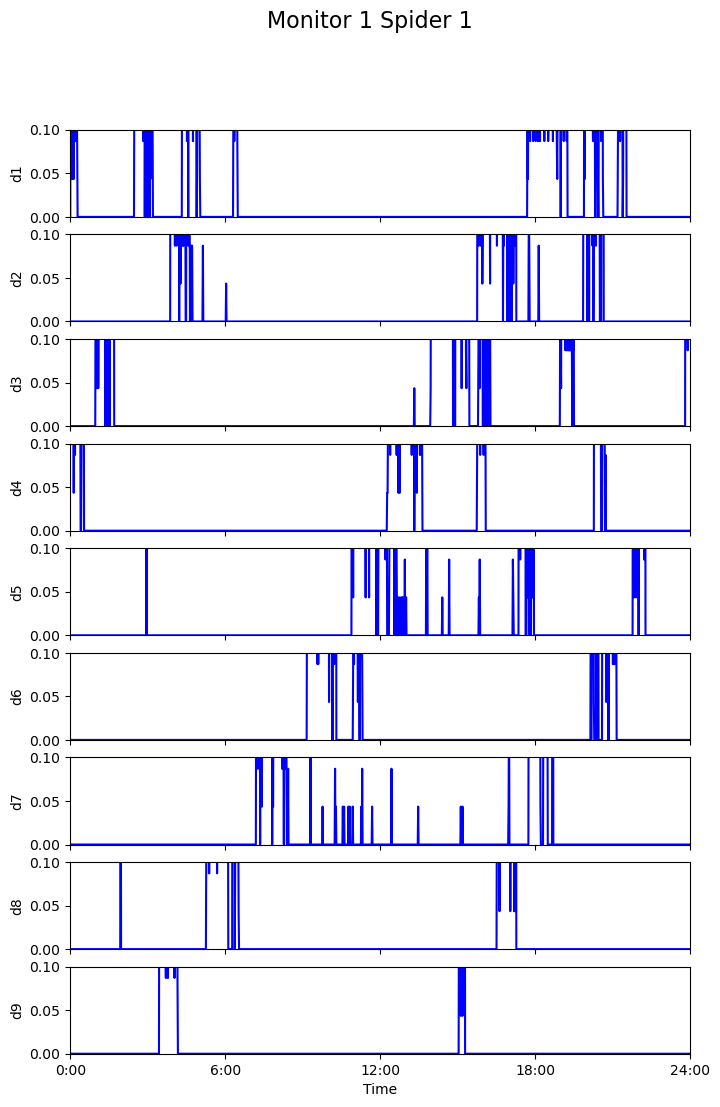

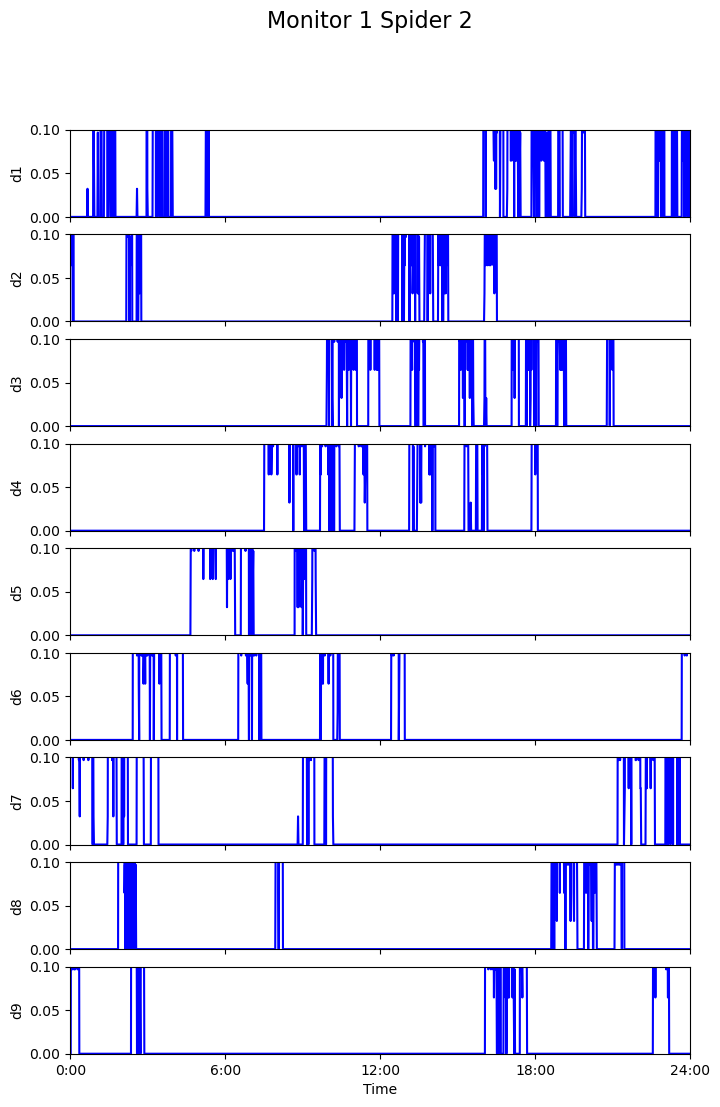

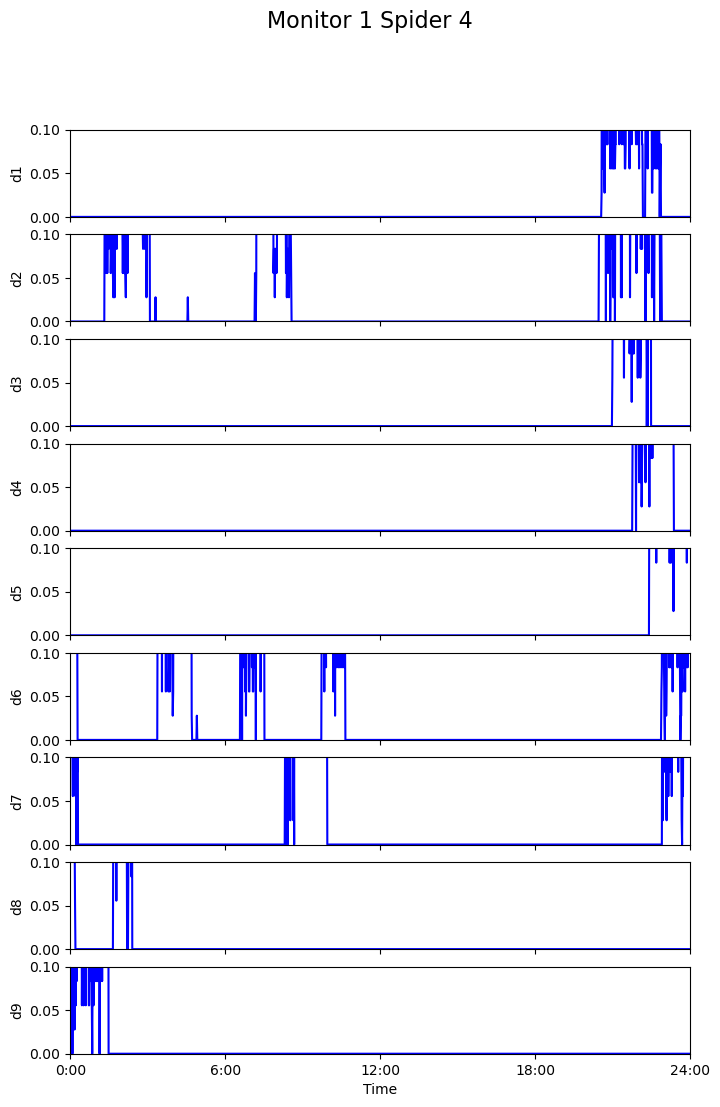

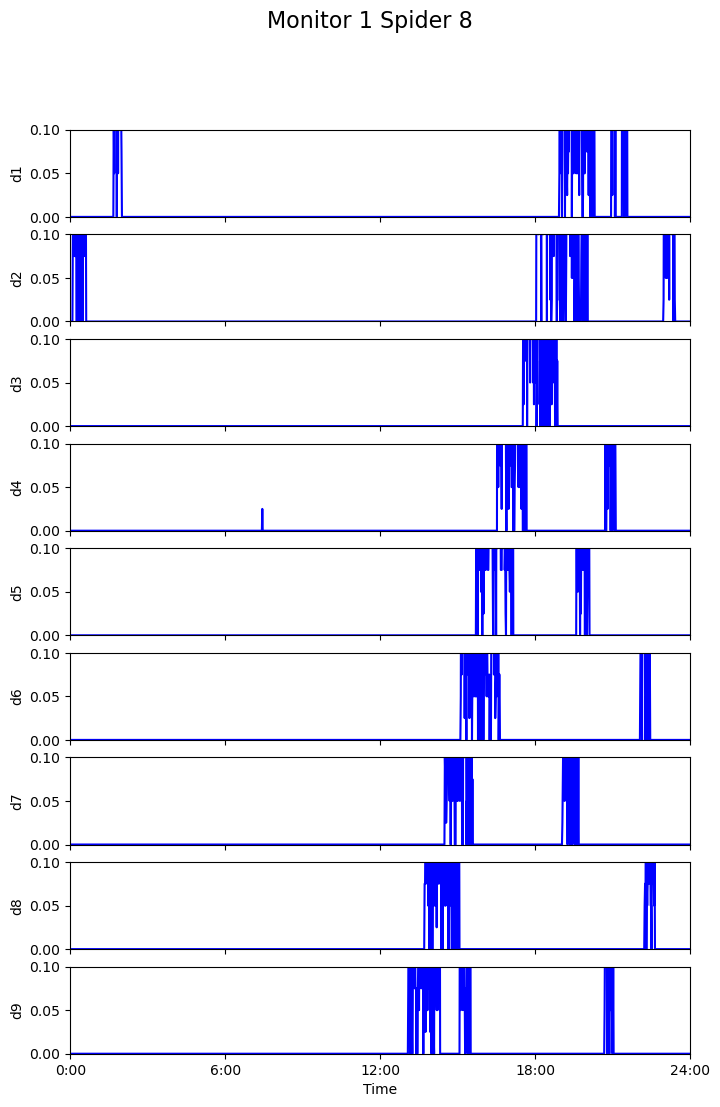

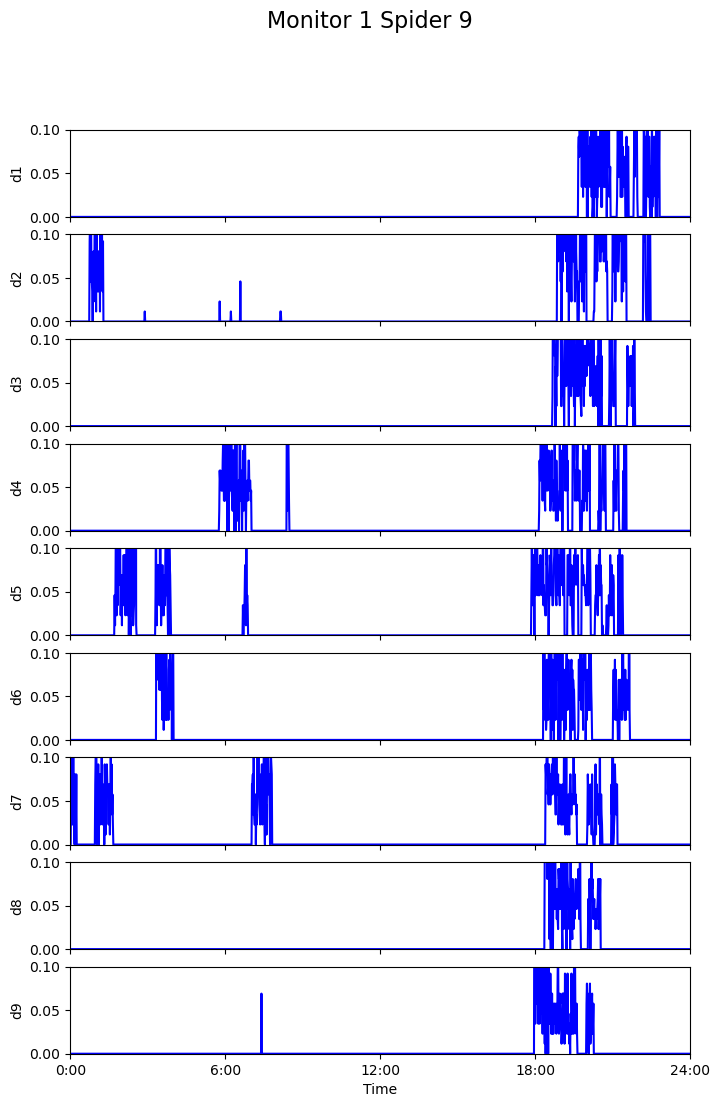

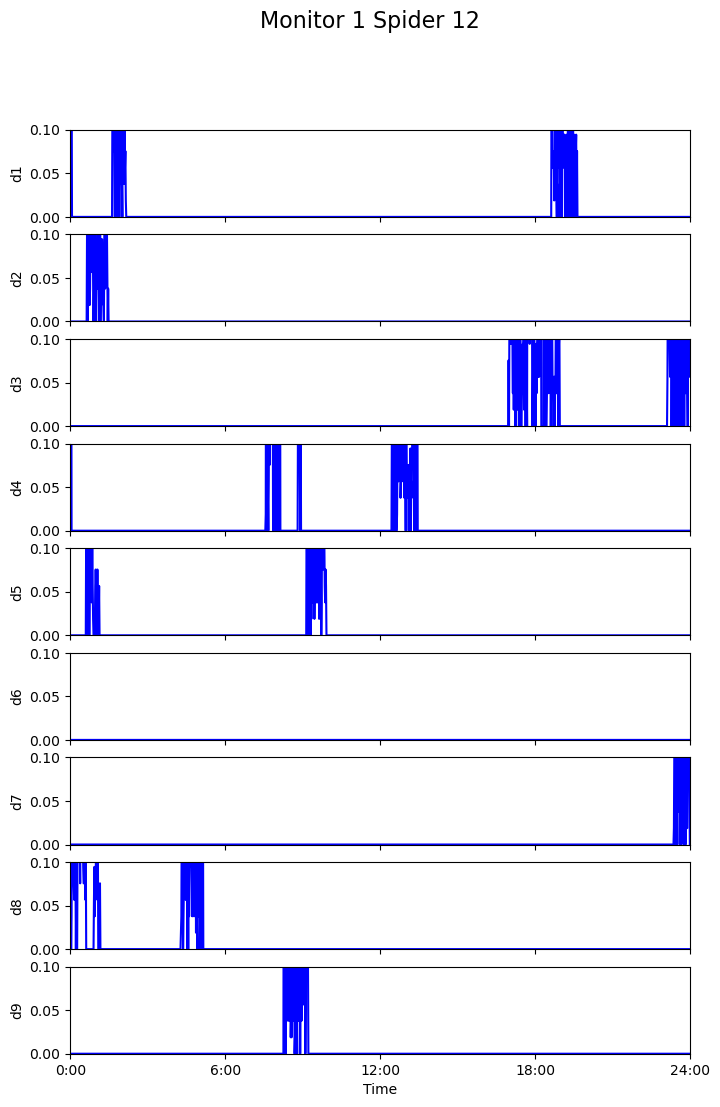

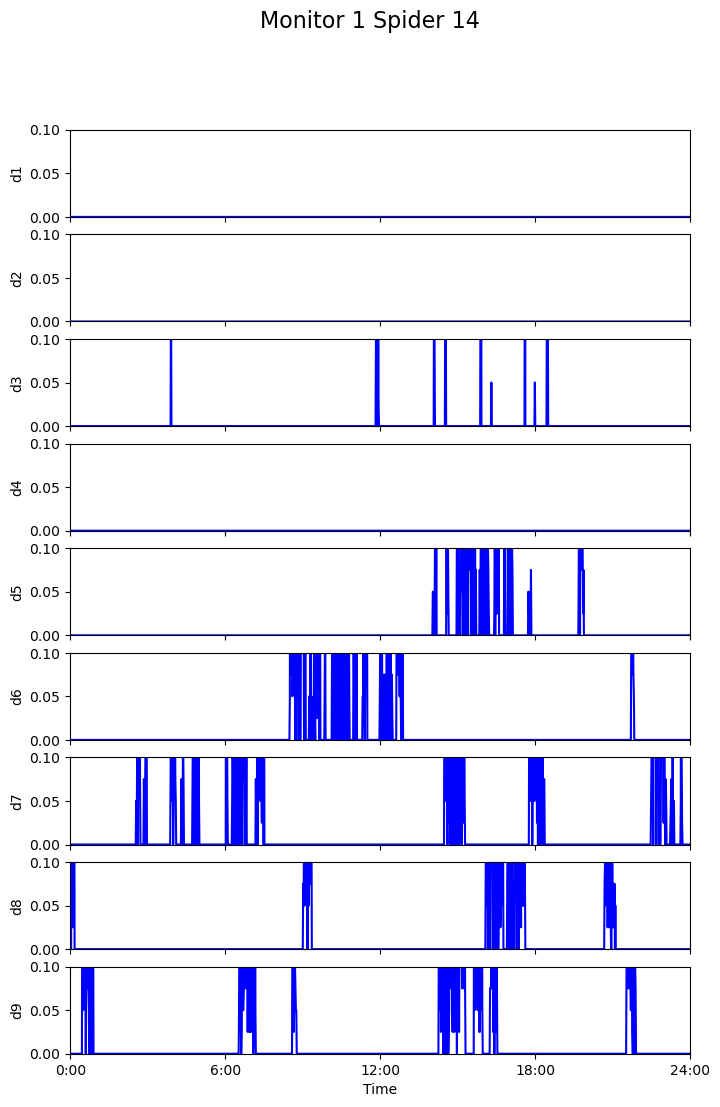

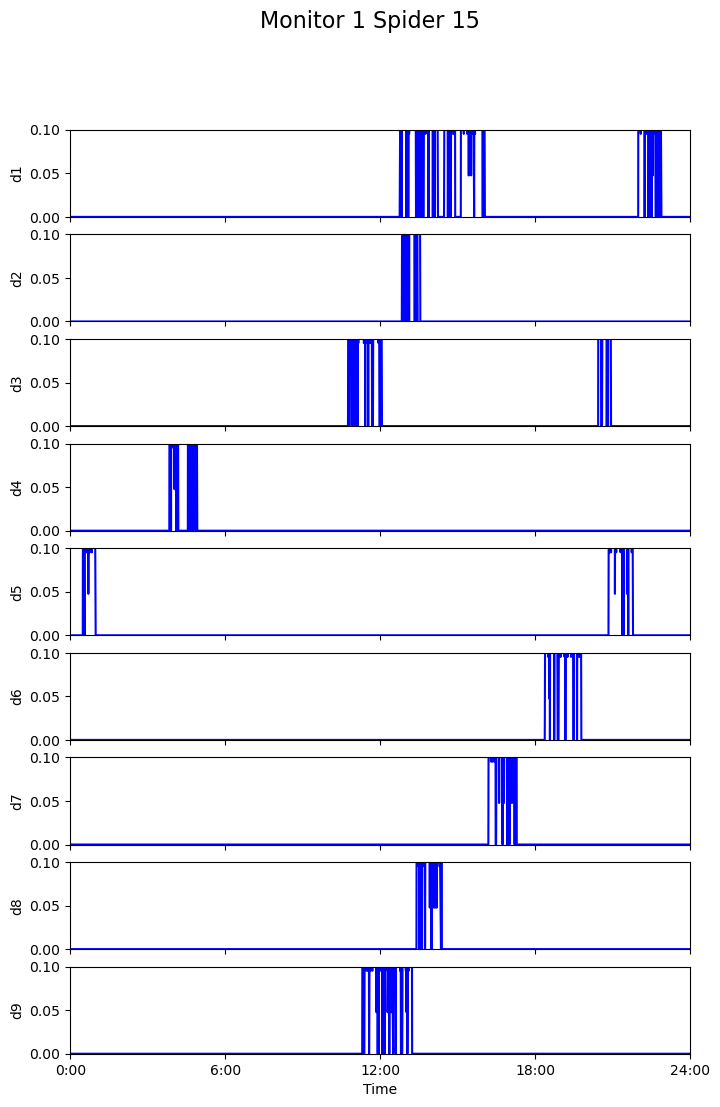

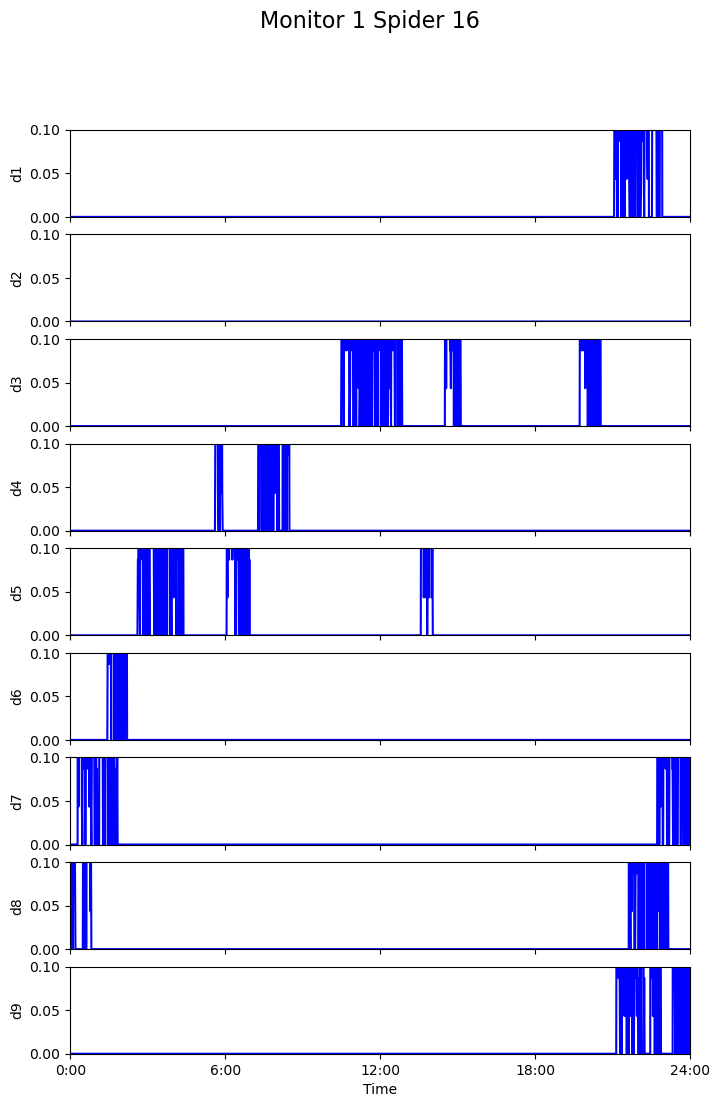

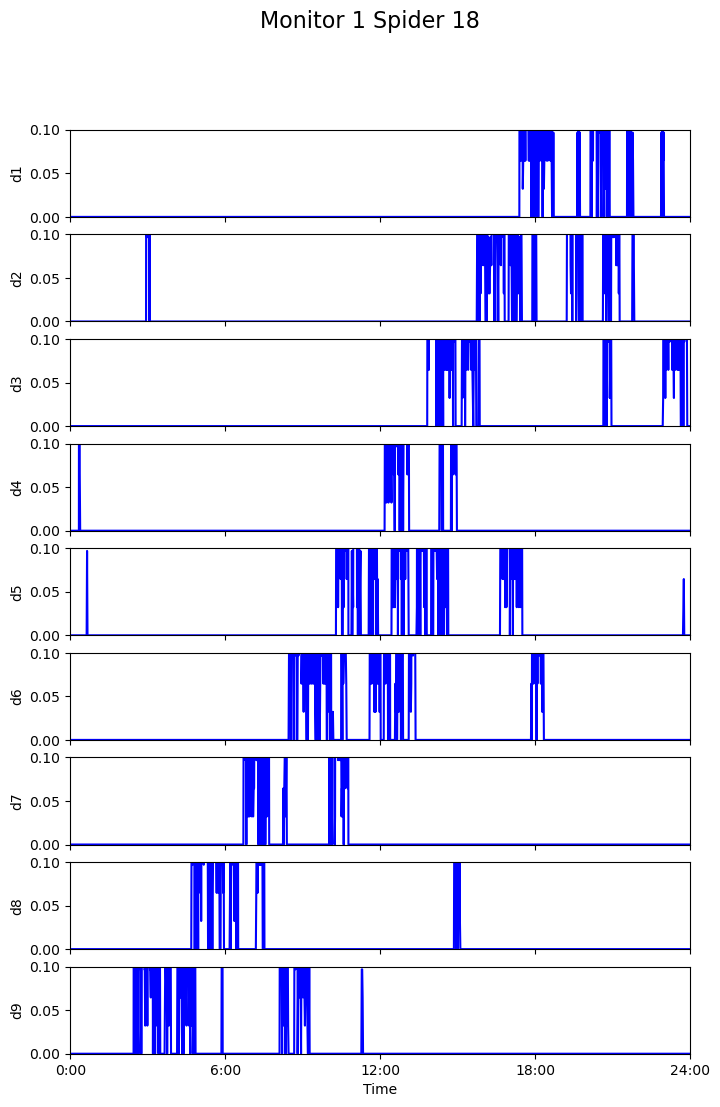

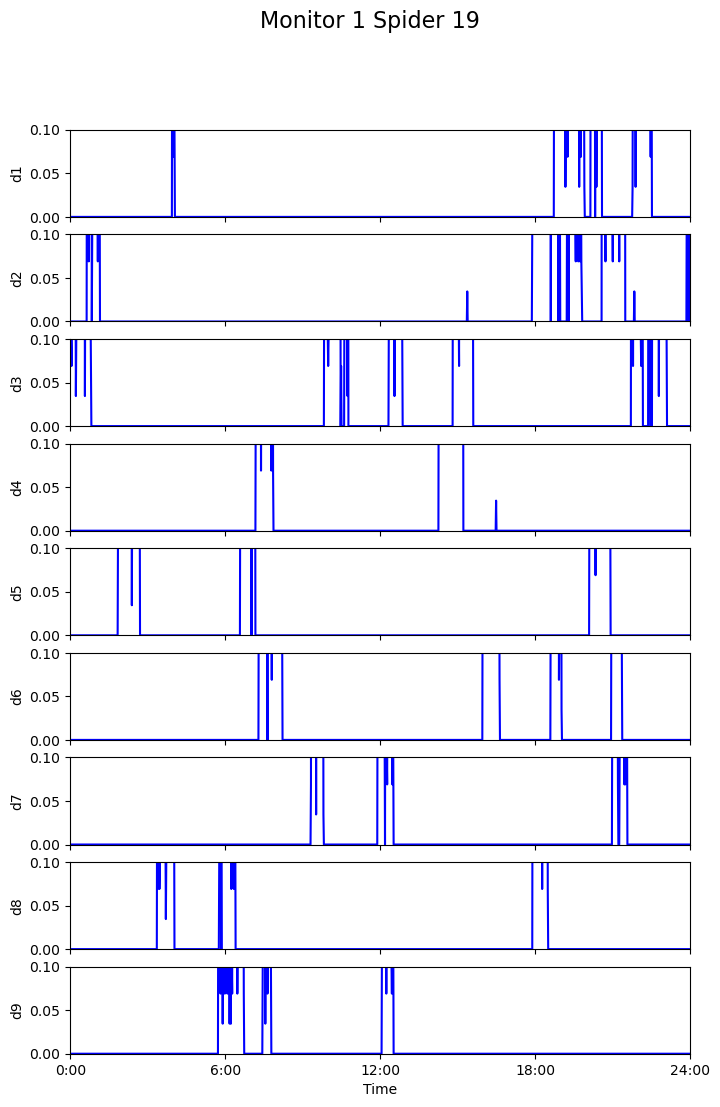

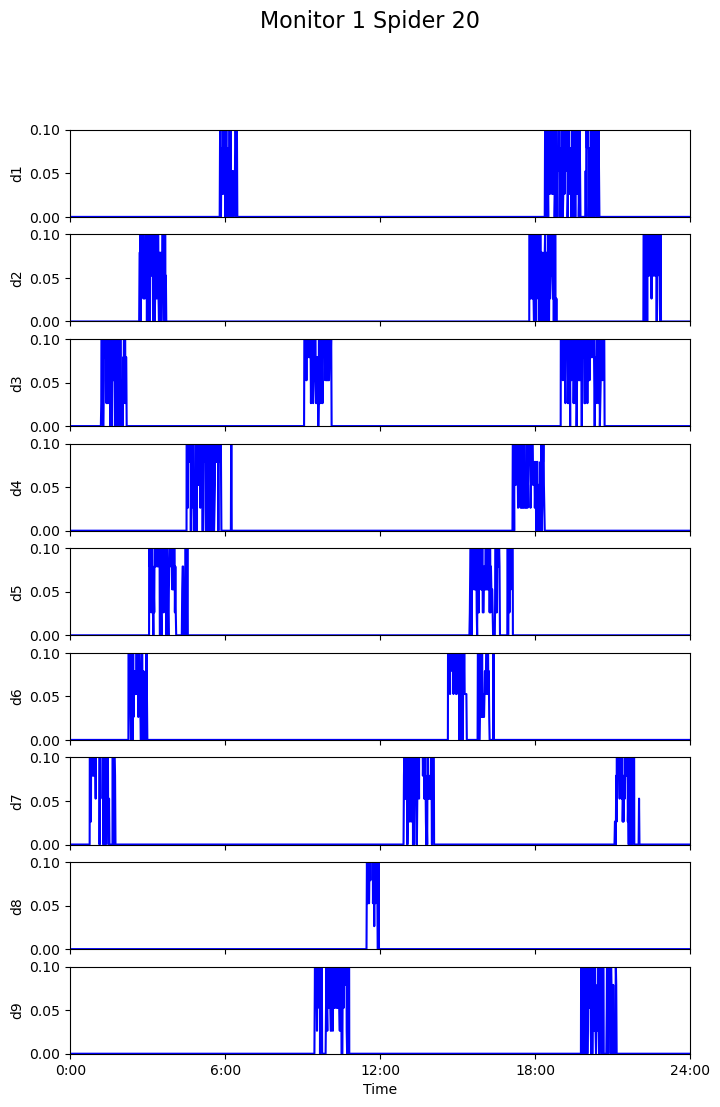

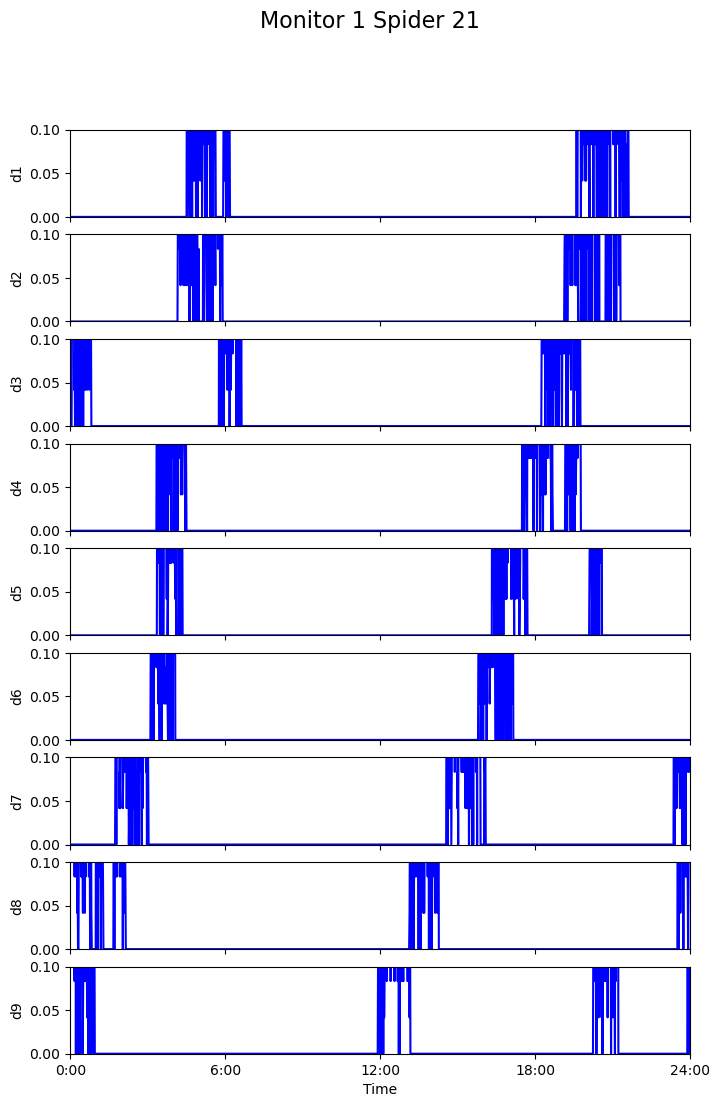

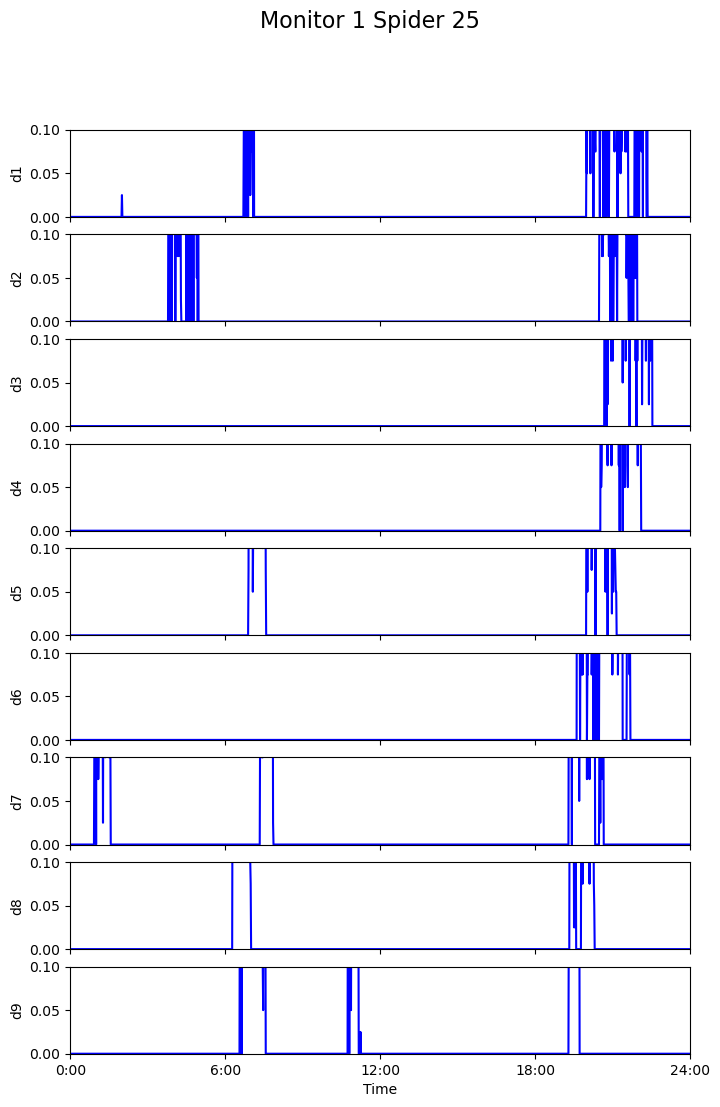

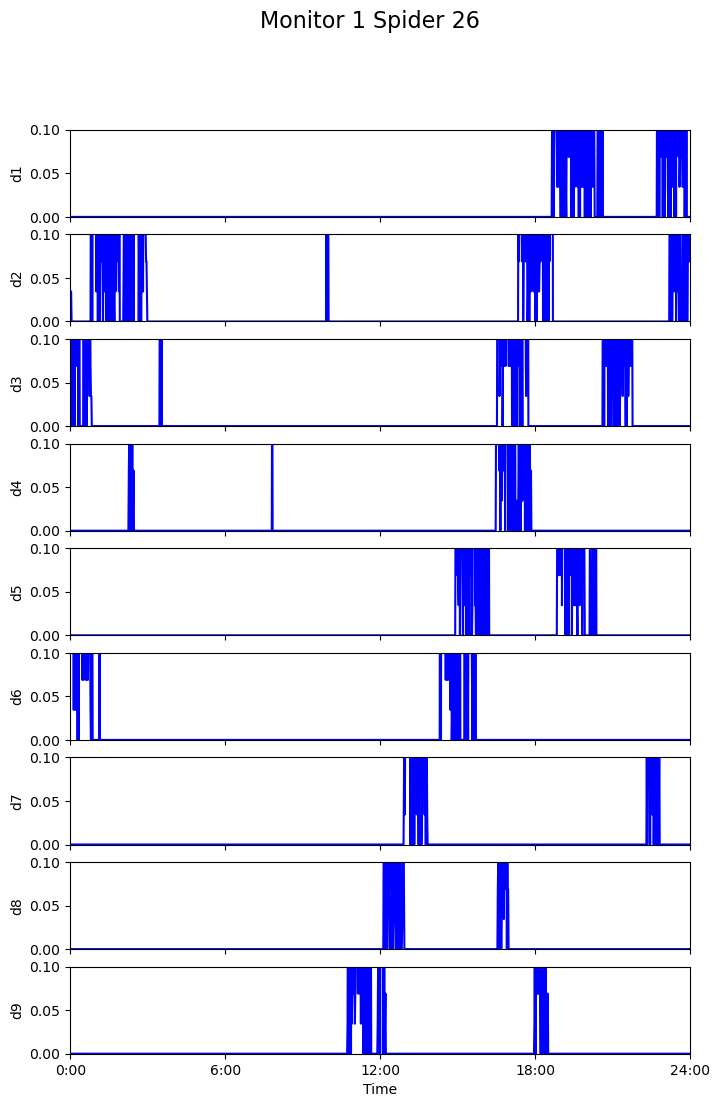

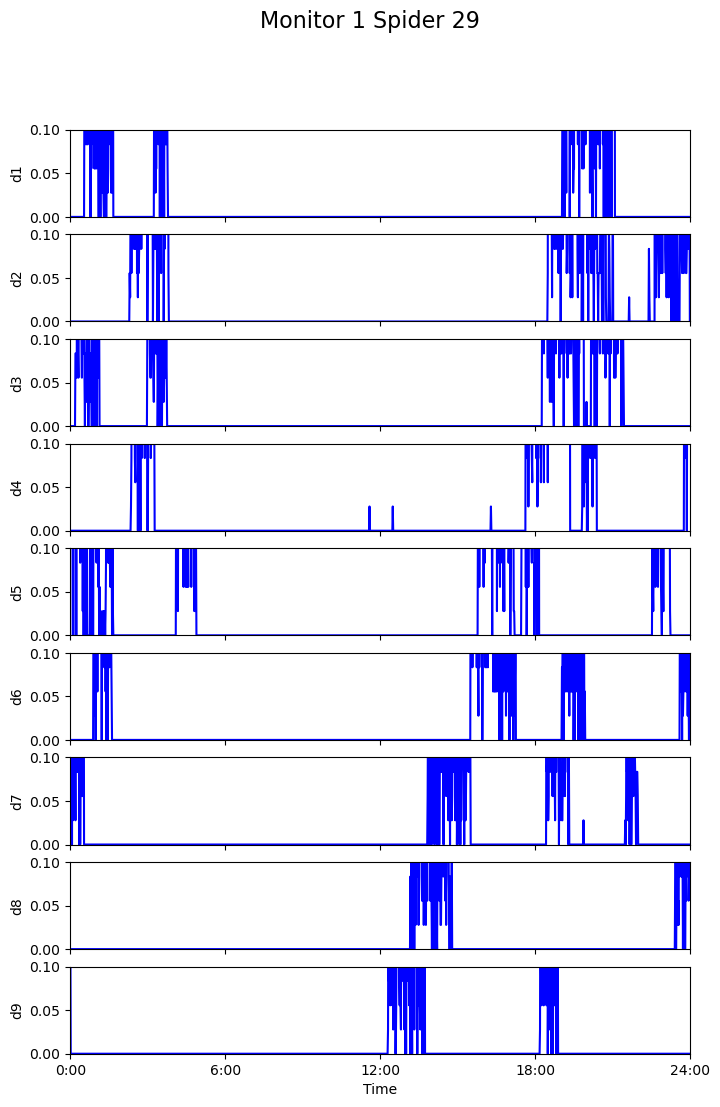

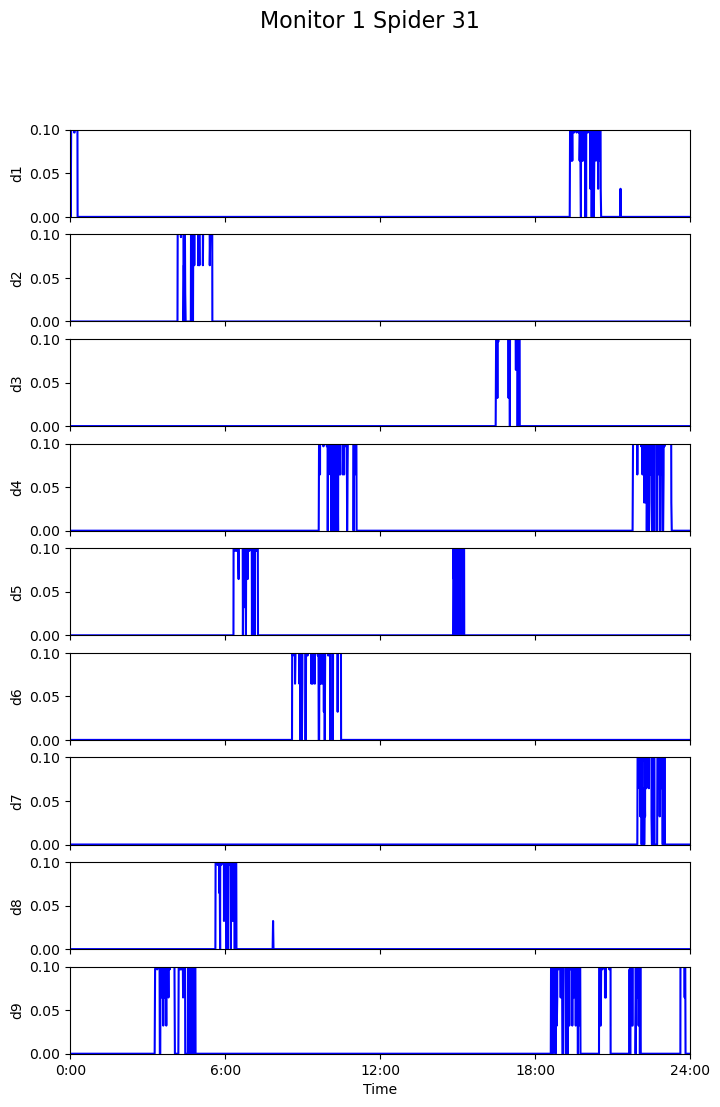

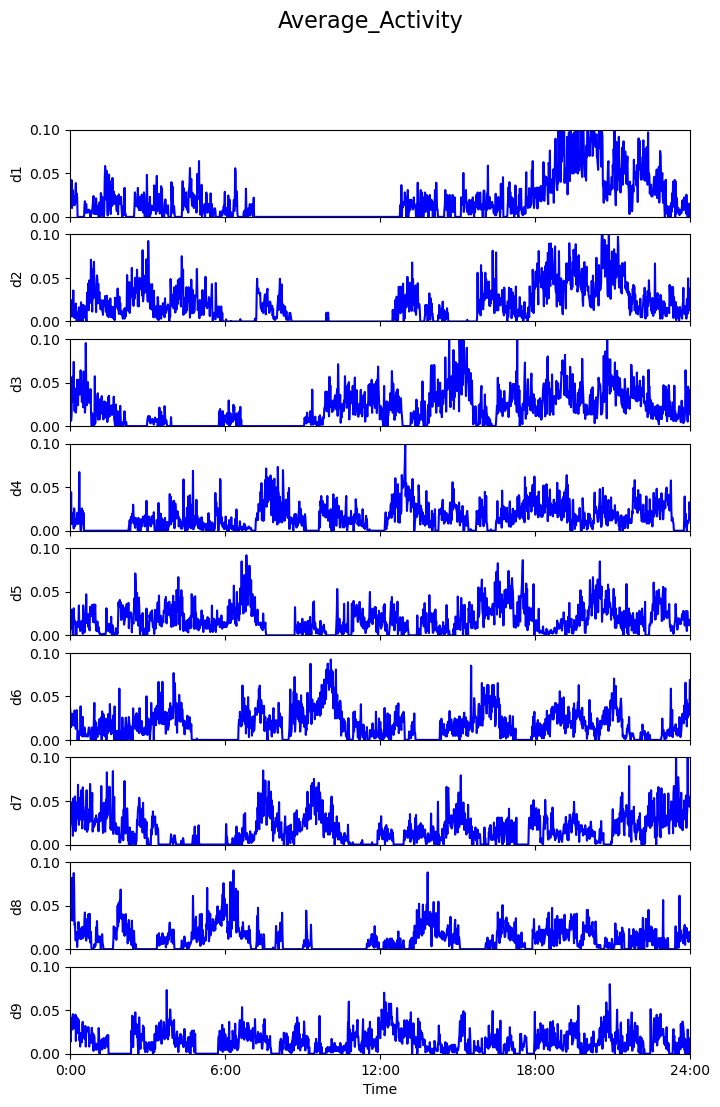

In [27]:
spider_raster(DDdf, DDdf_columns)

In [45]:
df2 = df1.copy()
#df2 = df2.drop(columns = ['lights', 'Average_Activity'])
df2 = df2.drop(columns = ['lights'])
display(df2)

,Date_Time,Monitor 1 Spider 1,Monitor 1 Spider 2,Monitor 1 Spider 4,Monitor 1 Spider 8,Monitor 1 Spider 9,Monitor 1 Spider 12,Monitor 1 Spider 14,Monitor 1 Spider 15,Monitor 1 Spider 16,Monitor 1 Spider 18,Monitor 1 Spider 19,Monitor 1 Spider 20,Monitor 1 Spider 21,Monitor 1 Spider 25,Monitor 1 Spider 26,Monitor 1 Spider 29,Monitor 1 Spider 31
0,2017-04-26 00:00:00,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,7
1,2017-04-26 00:01:00,11,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
2,2017-04-26 00:02:00,4,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,3
3,2017-04-26 00:03:00,4,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,11
4,2017-04-26 00:04:00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12955,2017-05-04 23:55:00,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0
12956,2017-05-04 23:56:00,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0
12957,2017-05-04 23:57:00,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0
12958,2017-05-04 23:58:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [115]:
columns= DDdf.columns[1:-1]
from sklearn import preprocessing


def average_subjective_activity_max_first(df, subjective_df):
    for spider in range(len(df.columns)):
        dft = df.copy()
        name = df.columns[spider]
        spider_period = subjective_df.Period[spider]
        subjective_hour = spider_period / 24
        hour = 0
        sub_hours = []
        for i in range(0, len(dft)):
            sub_hours.append(hour)
            if i % int(subjective_hour * 60) == 0 :
                hour += 1
            if hour == 24:
                hour = 0
        dft["Subjective Hours"] = sub_hours
        avg_mins = dft.groupby('Subjective Hours')[columns[spider]].mean()
        
        avg_mins_array = avg_mins.to_numpy()
        #print(avg_mins_array)
        normalized_arr = preprocessing.normalize([avg_mins_array])
        print(normalized_arr)
        #ndf = pd.DataFrame( index=range(0,24))
        #ndf['Activity'] = pd.Series(normalized_arr)
        ndf = pd.DataFrame({'spider': normalized_arr})
        display(ndf)
        
        max_avg_hour = avg_mins.argmax()
        reordered_avg_mins = pd.concat([avg_mins[max_avg_hour:], avg_mins[:max_avg_hour]])
        fig = plt.figure(figsize=(8, 6))
        plt.bar(range(0,24), reordered_avg_mins)
        plt.title(columns[spider] + ' Average Activity for Subjective Hours')
        plt.xlabel('Subjective Hours of Free Running Period')
        plt.ylabel('Average minutes of activity per subjective hour')
        tick_labels = list(range(max_avg_hour, 24)) + list(range(0, max_avg_hour))
        plt.xticks(range(len(tick_labels)), tick_labels)
        #fig.savefig(columns[spider] + 'Average_Subjective_Activity_Graph')
        plt.show()

In [116]:
average_subjective_activity_max_first(df2, periods)

[[1.15757487e-01 9.30198710e-02 4.25733579e-02 3.26590143e-02
  7.81483555e-02 9.06870842e-02 1.11973763e-01 1.45799171e-01
  3.64497927e-02 1.27720074e-01 1.74667407e-01 2.12866789e-02
  1.45799171e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 2.33278673e-03 2.91598342e-04
  1.86148885e-01 5.85788668e-01 6.87524090e-01 1.66859051e-01]]


ValueError: Per-column arrays must each be 1-dimensional